### Imports

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
sys.path.append('..')
from definitions import OUTPUTS_DIR

In [2]:
sns.set_theme(style="darkgrid", palette="pastel")

### Load the results

In [3]:
def load(root : str) -> pd.DataFrame:

    datasets = os.listdir(root)

    data = []

    for dataset in datasets:

        experiments = os.listdir(os.path.join(root, dataset))

        for experiment in experiments:

            if not os.path.isdir(os.path.join(root, dataset, experiment)):
                continue

            path = os.path.join(root, dataset, experiment, 'metrics.csv')

            if not os.path.exists(path):
                continue

            df = pd.read_csv(path)
            df['experiment'] = experiment
            df['dataset'] = dataset

            data.append(df)

    return pd.concat(data)

In [4]:
all = load(OUTPUTS_DIR)
all['loss'] = all['experiment'].apply(lambda x: x.split('_')[0])
all['layer'] = all['experiment'].apply(lambda x: x.split('_')[1])
all['epoch'] = all['epoch'] + 10

In [5]:
all.head()

,filename,iou,dice,time,epoch,experiment,dataset,loss,layer
0,('/home/abdelnour/Documents/ESI/5eme_anne/GNN-...,0.897419,0.945936,1.381423,10,cc_gcn,emd6,cc,gcn
1,('/home/abdelnour/Documents/ESI/5eme_anne/GNN-...,0.897068,0.945741,1.381423,20,cc_gcn,emd6,cc,gcn
2,('/home/abdelnour/Documents/ESI/5eme_anne/GNN-...,0.897068,0.945741,1.381423,30,cc_gcn,emd6,cc,gcn
3,('/home/abdelnour/Documents/ESI/5eme_anne/GNN-...,0.897068,0.945741,1.381423,40,cc_gcn,emd6,cc,gcn
4,('/home/abdelnour/Documents/ESI/5eme_anne/GNN-...,0.897462,0.945960,1.381423,50,cc_gcn,emd6,cc,gcn


### ISIC

In [6]:
results = all[all['dataset'] == 'isic2016']

- IoU Metric by epoch

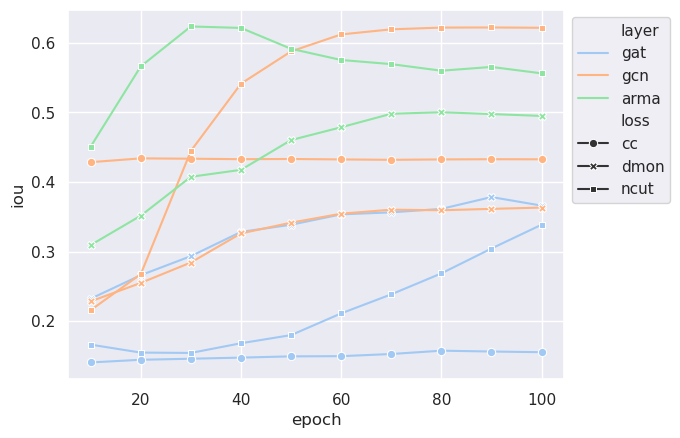

In [7]:
data = results.groupby(['loss','layer','epoch']).mean(numeric_only=True).reset_index()
ax = sns.lineplot(data=data, x='epoch', y='iou', hue='layer', style='loss', markers=True, dashes=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

- Print best epochs

In [8]:
for loss_layer in (data['layer']+'-'+data['loss']).unique():

    data_loss_layer = data[data['layer']+'-'+data['loss'] == loss_layer]

    best_epoch = data_loss_layer.iloc[data_loss_layer['iou'].argmax()].epoch

    print(f'Best epoch for {loss_layer}: {best_epoch}')

Best epoch for gat-cc: 80
Best epoch for gcn-cc: 20
Best epoch for arma-dmon: 80
Best epoch for gat-dmon: 90
Best epoch for gcn-dmon: 100
Best epoch for arma-ncut: 30
Best epoch for gat-ncut: 100
Best epoch for gcn-ncut: 90


- Comparing models according to IoU

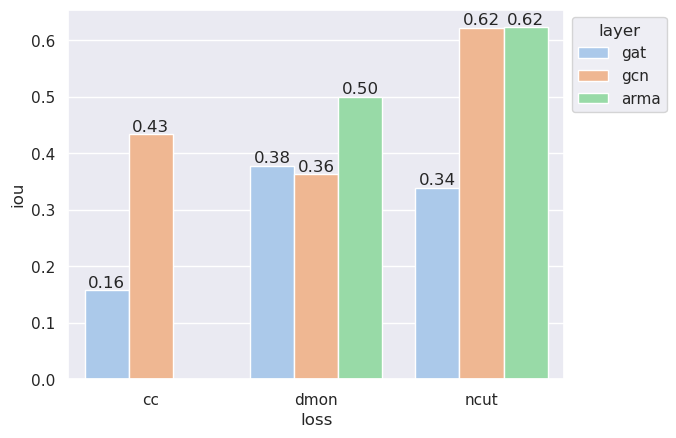

In [9]:
data_max_by_epoch = data.groupby(['loss','layer']).max().reset_index()
ax = sns.barplot(data=data_max_by_epoch, x='loss', y='iou', hue='layer')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

- Comparing metrics according to DICE

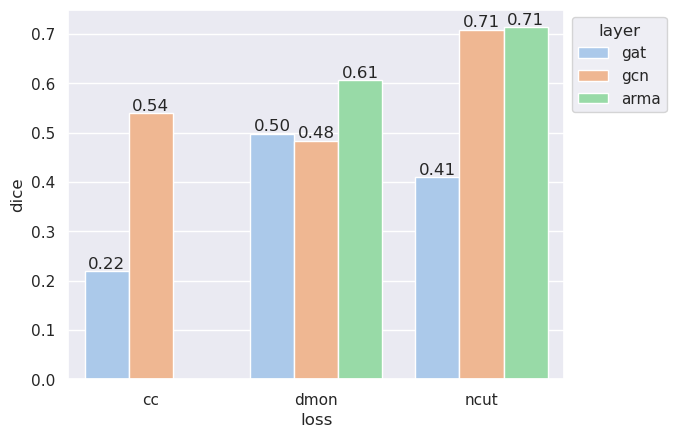

In [10]:
ax = sns.barplot(data=data_max_by_epoch, x='loss', y='dice', hue='layer')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

### EMD6

In [11]:
results = all[all['dataset'] == 'emd6']

- IoU Vs Epoch

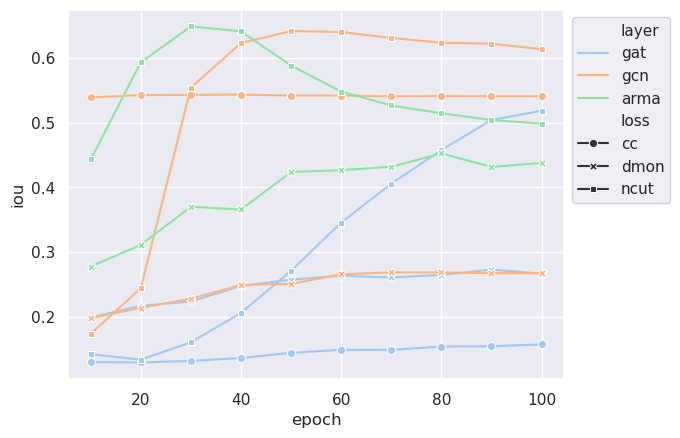

In [12]:
data = results.groupby(['loss','layer','epoch']).mean(numeric_only=True).reset_index()
ax = sns.lineplot(data=data, x='epoch', y='iou', hue='layer', style='loss', markers=True, dashes=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

- Print best epoch

In [13]:
for loss_layer in (data['layer']+'-'+data['loss']).unique():
    data_loss_layer = data[data['layer']+'-'+data['loss'] == loss_layer]
    best_epoch = data_loss_layer.iloc[data_loss_layer['iou'].argmax()].epoch
    print(f'Best epoch for {loss_layer}: {best_epoch}')

Best epoch for gat-cc: 100
Best epoch for gcn-cc: 40
Best epoch for arma-dmon: 80
Best epoch for gat-dmon: 90
Best epoch for gcn-dmon: 70
Best epoch for arma-ncut: 30
Best epoch for gat-ncut: 100
Best epoch for gcn-ncut: 50


- Comparing models according to IoU

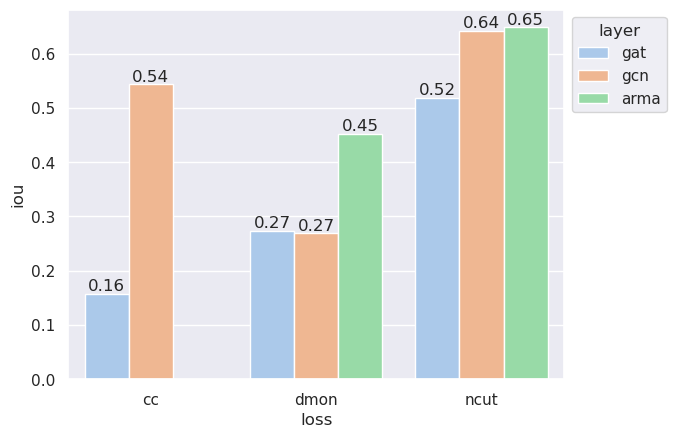

In [14]:
data_max_by_epoch = data.groupby(['loss','layer']).max().reset_index()
ax = sns.barplot(data=data_max_by_epoch, x='loss', y='iou', hue='layer')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

- Comparing models according to dice

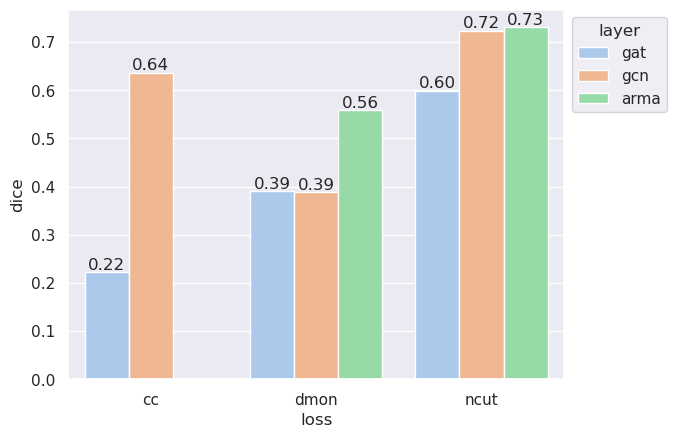

In [15]:
ax = sns.barplot(data=data_max_by_epoch, x='loss', y='dice', hue='layer')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

### Comparing different layers complexity

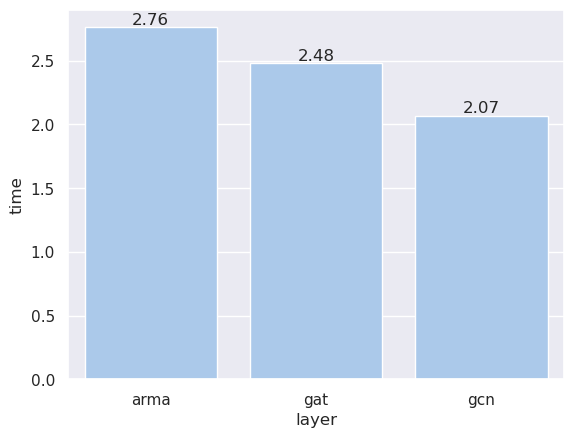

In [16]:
data = results[['time','layer']].groupby(['layer']).mean().reset_index()
ax = sns.barplot(data=data, x='layer', y='time')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

In [26]:
a = all.groupby('filename').iou.mean()
print(a[a.argsort()[::-1][:5]])

filename
('/home/abdelnour/Documents/ESI/5eme_anne/GNN-MiniProject/code/data/EMDS-6/EMDS5-Original/13/EMDS5-g13-05.png', '/home/abdelnour/Documents/ESI/5eme_anne/GNN-MiniProject/code/data/EMDS-6/EMDS5-Ground Truth/13/EMDS5-g13-05-GTM.png', '13')    0.884977
ISIC_0010063                                                                                                                                                                                                                                    0.880048
ISIC_0000259                                                                                                                                                                                                                                    0.864477
ISIC_0000207                                                                                                                                                                                                                                    0.86

/tmp/ipykernel_277700/1627460887.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(a[a.argsort()[::-1][:5]])
